In [11]:
import pandas as pd
df_filtered = pd.read_csv('cleaned_covid_data.csv')
df_filtered['date'] = pd.to_datetime(df_filtered['date']) #Convert date column to datetime

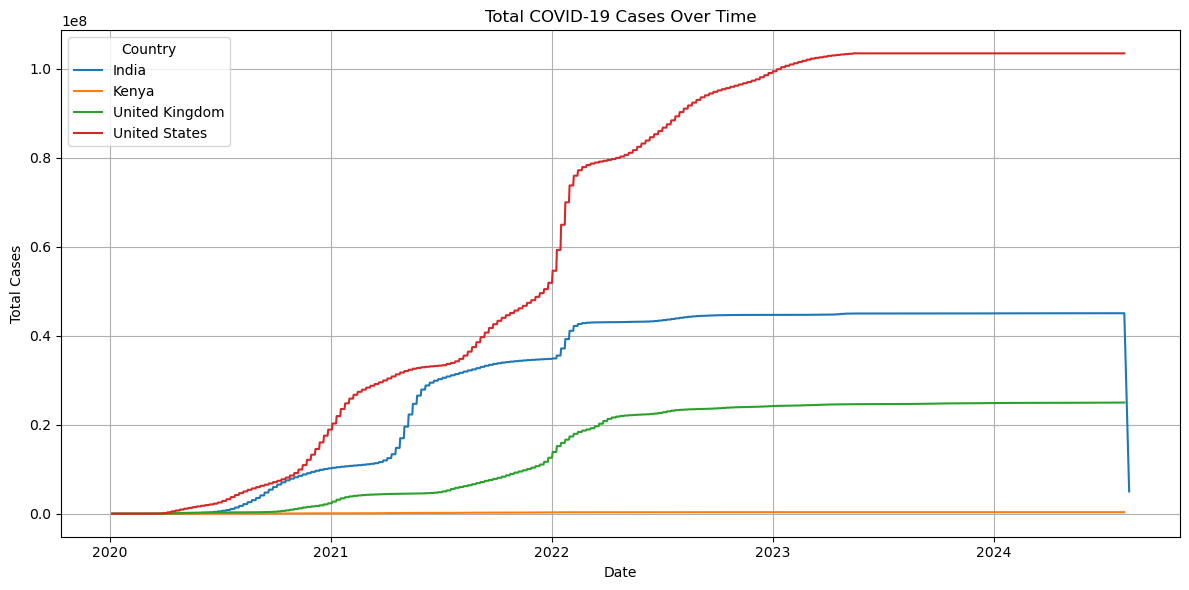

In [4]:
import matplotlib.pyplot as plt
# Line chart for Total Cases Over Time
plt.figure(figsize=(12, 6))

# Plot for each country
for country in df_filtered['location'].unique():
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Customize the plot
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


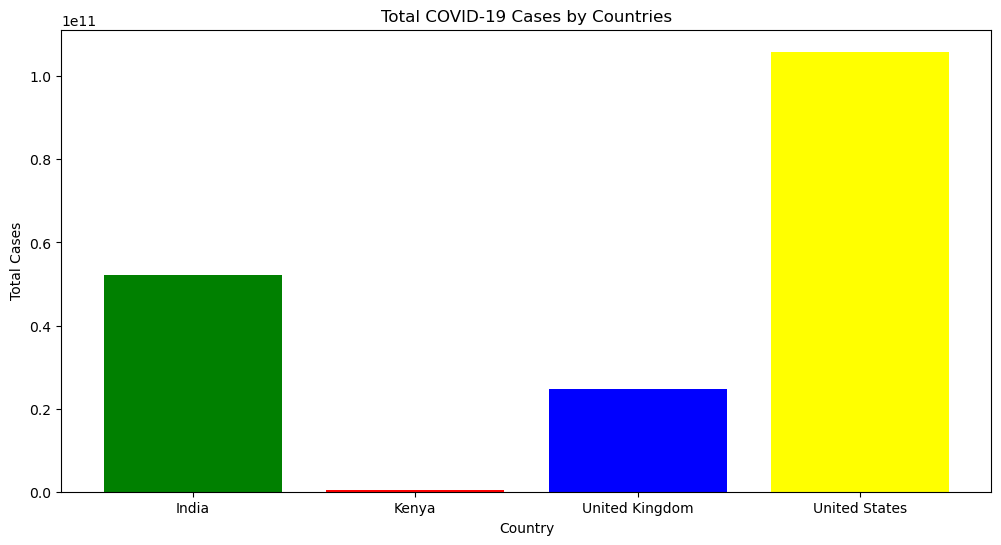

In [19]:
# First ensure your data is properly aggregated (one row per country)
df_filtered = df_filtered.groupby('location')['total_cases'].sum().reset_index()

# Then plot with explicit color mapping
country_order = ['India', 'Kenya', 'United Kingdom', 'United States']  
colors = ['green', 'red', 'blue', 'yellow']

plt.figure(figsize=(12, 6))
plt.bar(df_filtered['location'], 
        df_filtered['total_cases'], 
        color=[colors[country_order.index(c)] for c in df_filtered['location']])

plt.title('Total COVID-19 Cases by Countries')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()


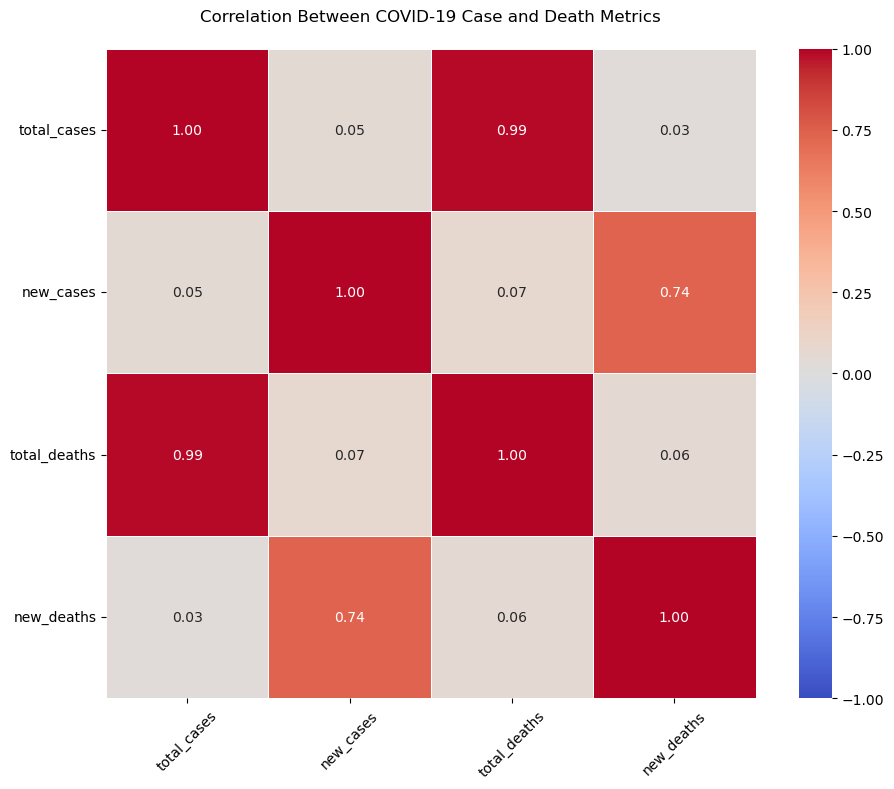

In [9]:
#Heatmaps (optional for correlation analysis)
# 1. Select only the required columns
target_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
df_selected = df_filtered[target_cols].copy()

# 2. Ensure numeric data types (in case they're stored as strings)
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# 3. Drop rows with missing values for clean correlation
df_clean = df_selected.dropna()

# 4. Calculate correlation matrix
corr_matrix = df_clean.corr()

# 5. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True)
plt.title("Correlation Between COVID-19 Case and Death Metrics", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

   
 